In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_csv('DataCleaning.csv')

In [3]:
df = df.set_index(['Date','CountryCode']).sort_index(level=['CountryCode','Date'])

In [4]:
df.head()

,,CountryName,StringencyIndex,excess_mort
Date,CountryCode,,,
2020-01-01,ABW,Aruba,0.0,0.000000
2020-01-06,ABW,Aruba,0.0,0.000000
2020-01-13,ABW,Aruba,0.0,0.000000
2020-01-20,ABW,Aruba,0.0,0.000000
2020-01-27,ABW,Aruba,0.0,1.906403


In [5]:
sns.set(style='ticks')

In [6]:
df.describe()

,StringencyIndex,excess_mort
count,31926.000000,33264.000000
mean,50.621887,88.705709
std,23.075013,116.345259
min,0.000000,-163.995748
25%,37.040000,0.662045
50%,52.780000,44.698523
75%,67.590000,150.244521
max,100.000000,908.264386


In [7]:
locations = df['CountryName'].unique()
print(locations)
print(locations.shape[0])

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium'
 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Democratic Republic of Congo' 'Congo' 'Colombia' 'Comoros' 'Cape Verde'
 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Faeroe Islands' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea'
 'Gambia' 'Greece' 'Greenland' 'Guatemala' 'Guyana' 'Hong Kong' 'Honduras'
 'Croatia' 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran' 'Iraq'
 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan'
 'Kenya' 'Kyrgy

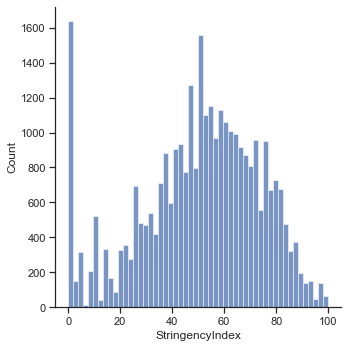

In [8]:
sns.displot(df['StringencyIndex'])

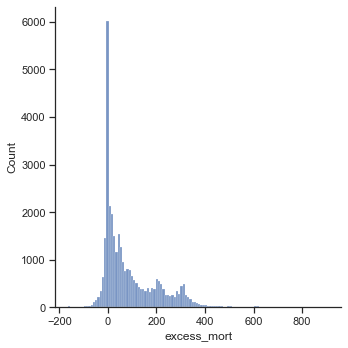

In [9]:
sns.displot(df['excess_mort'])

<AxesSubplot:xlabel='Date', ylabel='excess_mort'>

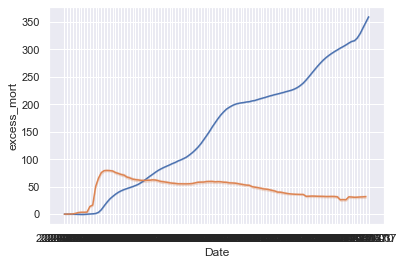

In [10]:
sns.set_style("darkgrid")
sns.lineplot(data=df[df['CountryName']=='United States'], x='Date', y='excess_mort')
sns.lineplot(data=df[df['CountryName']=='United States'], x='Date', y='StringencyIndex')

<AxesSubplot:xlabel='Date', ylabel='excess_mort'>

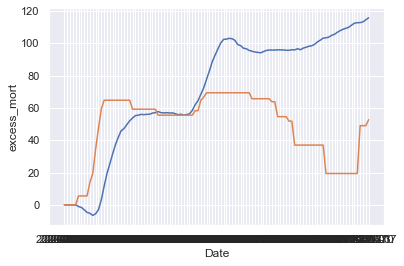

In [11]:
sns.lineplot(data=df[df['CountryName']=='Sweden'], x='Date', y='excess_mort')
sns.lineplot(data=df[df['CountryName']=='Sweden'], x='Date', y='StringencyIndex')

<AxesSubplot:xlabel='Date', ylabel='excess_mort'>

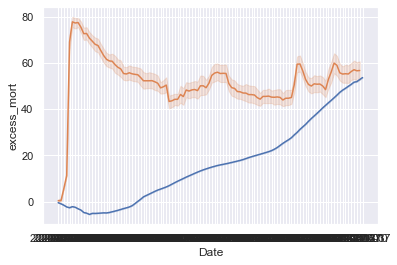

In [12]:
sns.lineplot(data=df[df['CountryName']=='China'], x='Date', y='excess_mort')
sns.lineplot(data=df[df['CountryName']=='China'], x='Date', y='StringencyIndex')

<AxesSubplot:xlabel='Date', ylabel='excess_mort'>

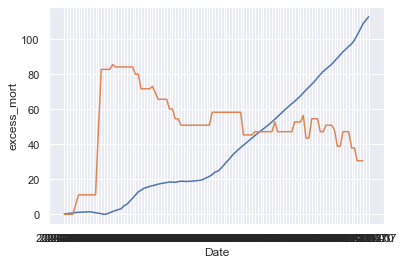

In [13]:
sns.lineplot(data=df[df['CountryName']=='Nigeria'], x='Date', y='excess_mort')
sns.lineplot(data=df[df['CountryName']=='Nigeria'], x='Date', y='StringencyIndex')

<AxesSubplot:xlabel='Date', ylabel='excess_mort'>

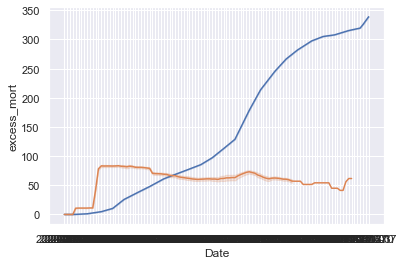

In [14]:
sns.lineplot(data=df[df['CountryName']=='Brazil'], x='Date', y='excess_mort')
sns.lineplot(data=df[df['CountryName']=='Brazil'], x='Date', y='StringencyIndex')

In [15]:
toughest = {}
for i in locations:
    toughest[i] = df['StringencyIndex'].loc[df['CountryName']== i].mean()

In [16]:
print(toughest)

{'Aruba': 42.58018691588784, 'Afghanistan': 34.69710280373833, 'Angola': 57.86157407407405, 'Albania': 51.35546296296301, 'Andorra': 44.62009433962265, 'United Arab Emirates': 51.76467289719629, 'Argentina': 68.96820754716988, 'Australia': 58.18196261682243, 'Austria': 56.19416666666666, 'Azerbaijan': 63.867169811320686, 'Burundi': 13.48584905660376, 'Belgium': 51.6724074074074, 'Benin': 39.670370370370364, 'Burkina Faso': 27.41113207547166, 'Bangladesh': 67.1156603773585, 'Bulgaria': 43.496415094339625, 'Bahrain': 50.60435185185187, 'Bahamas': 59.3759813084113, 'Bosnia and Herzegovina': 42.26850467289719, 'Belarus': 29.3222641509434, 'Belize': 60.79168224299065, 'Bermuda': 47.54481132075474, 'Bolivia': 49.84403846153845, 'Brazil': 60.15425688073369, 'Barbados': 54.19346153846156, 'Brunei': 46.183925233644835, 'Bhutan': 61.49551401869161, 'Botswana': 48.93268518518524, 'Central African Republic': 28.00224299065422, 'Canada': 55.92505794137704, 'Switzerland': 46.146168224299046, 'Chile'

In [17]:
sorted(toughest.items(), key=lambda x: x[1], reverse=True)

[('Honduras', 72.99233644859811),
 ('Venezuela', 71.6454716981132),
 ('Peru', 69.22873786407771),
 ('Argentina', 68.96820754716988),
 ('Myanmar', 67.35084112149534),
 ('Bangladesh', 67.1156603773585),
 ('Italy', 67.07785046728974),
 ('Iraq', 67.04833333333345),
 ('Jamaica', 66.902641509434),
 ('Philippines', 66.85219047619053),
 ('Eritrea', 66.76907407407408),
 ('Libya', 66.35495049504956),
 ('Palestine', 65.9314953271028),
 ('India', 65.89027777777774),
 ('Panama', 65.44838095238097),
 ('Suriname', 65.35121495327101),
 ('Morocco', 64.81462264150946),
 ('Kazakhstan', 64.58551401869161),
 ('Greece', 64.5826851851852),
 ('Trinidad and Tobago', 64.0378095238095),
 ('Azerbaijan', 63.867169811320686),
 ('Chile', 63.590093457943944),
 ('Vietnam', 62.92320754716985),
 ('Uganda', 62.19424528301884),
 ('Lebanon', 61.81867924528294),
 ('Bhutan', 61.49551401869161),
 ('Colombia', 61.4893518518519),
 ('Gabon', 61.47764150943397),
 ('Nepal', 61.445740740740774),
 ('Malaysia', 61.407169811320806),
 

In [18]:
highest_mort = {}
for i in locations:
    highest_mort[i] = df['excess_mort'].loc[df['CountryName']== i].sum()

In [19]:
sorted(highest_mort.items(), key=lambda x: x[1], reverse=True)

[('United States', 864755.8344822901),
 ('Brazil', 437543.0315003536),
 ('United Kingdom', 66574.7251458565),
 ('China', 55735.82711973851),
 ('Canada', 53817.12861594361),
 ('Peru', 37323.01114645206),
 ('Bulgaria', 31299.035212384242),
 ('Russia', 29154.155597492714),
 ('Saudi Arabia', 27671.693193234914),
 ('Belarus', 27578.13951560776),
 ('Serbia', 27482.32705066131),
 ('Lithuania', 26380.326526438388),
 ('Mexico', 26282.470926774906),
 ('Iraq', 26083.193661727924),
 ('Bosnia and Herzegovina', 25123.47366326667),
 ('Ecuador', 25066.01566546053),
 ('San Marino', 24446.44757017023),
 ('Albania', 23202.61797208766),
 ('Bolivia', 22725.650346457),
 ('Romania', 22531.26133068611),
 ('Honduras', 21923.682714989955),
 ('Djibouti', 20412.25156532096),
 ('Monaco', 19244.14835085315),
 ('Czech Republic', 18594.377423581493),
 ('Nicaragua', 18579.366802695444),
 ('Slovak Republic', 18523.75706330072),
 ('Italy', 18444.732025038025),
 ('Poland', 18281.872728494298),
 ('Kazakhstan', 17364.41879

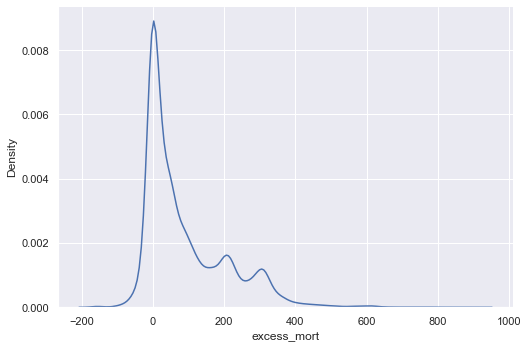

In [20]:
sns.displot(data=df, x="excess_mort", kind='kde', aspect = 1.5)

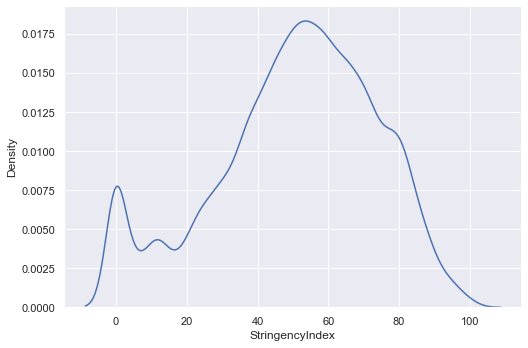

In [21]:
sns.displot(data=df, x="StringencyIndex", kind="kde", aspect = 1.5)

In [22]:
adict = defaultdict(list)
for d in (toughest, highest_mort):
    for key, value in d.items():
        adict[key].append(value)
print(adict)

defaultdict(<class 'list'>, {'Aruba': [42.58018691588784, 10423.084395803933], 'Afghanistan': [34.69710280373833, 7564.492568247987], 'Angola': [57.86157407407405, 4027.033356870983], 'Albania': [51.35546296296301, 23202.61797208766], 'Andorra': [44.62009433962265, 12698.518059622009], 'United Arab Emirates': [51.76467289719629, 9791.235129081004], 'Argentina': [68.96820754716988, 13817.367760783975], 'Australia': [58.18196261682243, -3090.255654204641], 'Austria': [56.19416666666666, 8036.2889019860395], 'Azerbaijan': [63.867169811320686, 16597.864998616948], 'Burundi': [13.48584905660376, 6801.989215482983], 'Belgium': [51.6724074074074, 12436.976921642668], 'Benin': [39.670370370370364, -2345.4159953980115], 'Burkina Faso': [27.41113207547166, 2125.9906012659817], 'Bangladesh': [67.1156603773585, 14981.692729863962], 'Bulgaria': [43.496415094339625, 31299.035212384242], 'Bahrain': [50.60435185185187, 10138.895377330966], 'Bahamas': [59.3759813084113, 8663.190557160973], 'Bosnia and 

In [23]:
df2 = pd.DataFrame.from_dict(adict, orient='index', columns=['toughest','highest_mort'])

<AxesSubplot:xlabel='toughest', ylabel='highest_mort'>

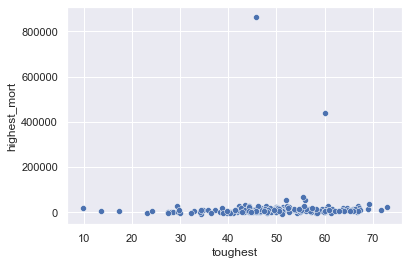

In [24]:
sns.scatterplot(data=df2, x='toughest', y='highest_mort')

In [25]:
df3 = df2
df3 = df3.drop(['United States', 'Brazil','United Kingdom','China','Canada'])

<AxesSubplot:xlabel='toughest', ylabel='highest_mort'>

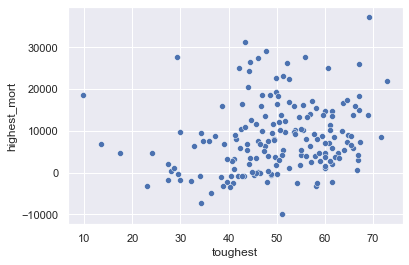

In [26]:
sns.scatterplot(data=df3, x='toughest', y='highest_mort')

In [27]:
mean_mort = {}
for i in locations:
    mean_mort[i] = df['excess_mort'].loc[df['CountryName']== i].mean()

In [28]:
sorted(mean_mort.items(), key=lambda x: x[1], reverse=True)

[('Peru', 345.58343654122285),
 ('Bulgaria', 289.8058815961504),
 ('Russia', 269.9458851619695),
 ('Saudi Arabia', 256.21938141884175),
 ('Belarus', 255.3531436630347),
 ('Serbia', 254.46599120982688),
 ('Lithuania', 244.2622826522073),
 ('Mexico', 243.35621228495282),
 ('Iraq', 241.51105242340677),
 ('Bosnia and Herzegovina', 232.62475614135806),
 ('Ecuador', 232.092737643153),
 ('San Marino', 226.35599602009466),
 ('Albania', 214.839055297108),
 ('Bolivia', 210.4226883931204),
 ('Romania', 208.62279009894544),
 ('Honduras', 202.99706217583287),
 ('Djibouti', 189.00232930852738),
 ('Monaco', 178.18655880419576),
 ('Czech Republic', 172.1701613294583),
 ('Nicaragua', 172.03117409903192),
 ('Slovak Republic', 171.5162691046363),
 ('Italy', 170.78455578738908),
 ('Poland', 169.2765993379102),
 ('Kazakhstan', 160.78165547006398),
 ('Turkey', 159.4392296978698),
 ('South Africa', 155.7897027806513),
 ('United States', 153.98073975824107),
 ('Azerbaijan', 153.6839351723791),
 ('Moldova', 15

In [29]:
bdict = defaultdict(list)
for d in (toughest, mean_mort):
    for key, value in d.items():
        bdict[key].append(value)
print(bdict)

defaultdict(<class 'list'>, {'Aruba': [42.58018691588784, 96.51004070188827], 'Afghanistan': [34.69710280373833, 70.04159785414802], 'Angola': [57.86157407407405, 37.28734589695355], 'Albania': [51.35546296296301, 214.839055297108], 'Andorra': [44.62009433962265, 117.57887092242598], 'United Arab Emirates': [51.76467289719629, 90.65958452852782], 'Argentina': [68.96820754716988, 127.93859037762941], 'Australia': [58.18196261682243, -28.613478279672602], 'Austria': [56.19416666666666, 74.41008242579666], 'Azerbaijan': [63.867169811320686, 153.6839351723791], 'Burundi': [13.48584905660376, 62.98138162484244], 'Belgium': [51.6724074074074, 115.1571937189136], 'Benin': [39.670370370370364, -21.716814772203794], 'Burkina Faso': [27.41113207547166, 19.685098159870197], 'Bangladesh': [67.1156603773585, 138.71937712837], 'Bulgaria': [43.496415094339625, 289.8058815961504], 'Bahrain': [50.60435185185187, 93.87866090121263], 'Bahamas': [59.3759813084113, 80.21472738112013], 'Bosnia and Herzegovi

In [30]:
df4 = pd.DataFrame.from_dict(bdict, orient='index', columns=['toughest','mean_mort'])

<AxesSubplot:xlabel='toughest', ylabel='mean_mort'>

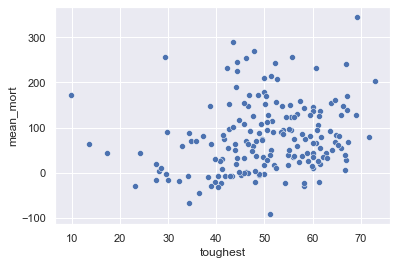

In [34]:
sns.scatterplot(data=df4, x='toughest', y='mean_mort')

In [32]:
df.to_csv('EDA.csv')
df2.to_csv('EDA_Summary.csv')